In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import colormaps


In [2]:
data2 = pd.read_excel(r'/Users/joshpyf/Downloads/Dataset/Customer Loyality Program.xlsx')[:30]

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data2.columns

Index(['Loyalty#', 'Customer Name', 'Country', 'Province or State', 'City',
       'Latitude', 'Longitude', 'Postal code', 'Gender', 'Education',
       'Location Code', 'Income', 'Marital Status', 'Order Year', 'Quarter',
       'MonthsAsMember', 'Loyalty Status', 'Product Line', 'Coupon Response',
       'Count', 'Quantity Sold', 'Unit Sale Price', 'Unit Cost', 'Revenue',
       'Customer Lifetime Value', 'Loyalty Count'],
      dtype='object')

In [5]:
#reordering columns headers

In [5]:
new_header=['Loyalty#','Customer Name','Gender','Marital Status','Education',
       'Income','Country','Province or State','City',
       'Latitude', 'Longitude','Postal code',
       'Location Code','Order Year','Quarter',
       'MonthsAsMember','Loyalty Status','Product Line','Coupon Response',
       'Count', 'Quantity Sold', 'Unit Sale Price', 'Unit Cost','Revenue',
       'Customer Lifetime Value','Loyalty Count']

In [6]:
data2.head(2)

,Loyalty#,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,Order Year,Quarter,MonthsAsMember,Loyalty Status,Product Line,Coupon Response,Count,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,Loyalty Count
0,837810,Abigail Goris,Canada,British Columbia,Dawson Creek,55.759627,-120.237662,U5I 4F1,male,Bachelor,Rural,42142,Single,2016,Q3,33,Bronze,Computers and Home Office,Coupon 6,1,3,1182,1004.7,3546,8842.65,1
1,707928,Ada Glade,Germany,Bremen,Bremen,53.079296,8.801694,28759,male,High School or Below,Rural,20978,Married,2016,Q3,52,Bronze,Computers and Home Office,Coupon 1,1,1,434,368.9,434,3508.57,1


In [7]:
data2 =data2.loc[:,new_header]

In [ ]:
#cleaning and renaming columns header "Loyality#"

In [8]:
data2=data2.rename(columns={'Loyalty#':'ID'})

In [9]:
data2.head(2)

,ID,Customer Name,Gender,Marital Status,Education,Income,Country,Province or State,City,Latitude,Longitude,Postal code,Location Code,Order Year,Quarter,MonthsAsMember,Loyalty Status,Product Line,Coupon Response,Count,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,Loyalty Count
0,837810,Abigail Goris,male,Single,Bachelor,42142,Canada,British Columbia,Dawson Creek,55.759627,-120.237662,U5I 4F1,Rural,2016,Q3,33,Bronze,Computers and Home Office,Coupon 6,1,3,1182,1004.7,3546,8842.65,1
1,707928,Ada Glade,male,Married,High School or Below,20978,Germany,Bremen,Bremen,53.079296,8.801694,28759,Rural,2016,Q3,52,Bronze,Computers and Home Office,Coupon 1,1,1,434,368.9,434,3508.57,1


In [10]:
data2 = data2.drop(columns=['Loyalty Count','Count'],axis = 1)

In [11]:
data2.head(2)

,ID,Customer Name,Gender,Marital Status,Education,Income,Country,Province or State,City,Latitude,Longitude,Postal code,Location Code,Order Year,Quarter,MonthsAsMember,Loyalty Status,Product Line,Coupon Response,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value
0,837810,Abigail Goris,male,Single,Bachelor,42142,Canada,British Columbia,Dawson Creek,55.759627,-120.237662,U5I 4F1,Rural,2016,Q3,33,Bronze,Computers and Home Office,Coupon 6,3,1182,1004.7,3546,8842.65
1,707928,Ada Glade,male,Married,High School or Below,20978,Germany,Bremen,Bremen,53.079296,8.801694,28759,Rural,2016,Q3,52,Bronze,Computers and Home Office,Coupon 1,1,434,368.9,434,3508.57


In [64]:
data2['Longitude']=data2['Longitude'].astype('string')

In [66]:
data2['Longitude']=data2['Longitude'].str.replace('-','')

In [67]:
data2['Longitude']=data2['Longitude'].astype('float')

In [69]:
data2.head(2)

,ID,Customer Name,Gender,Marital Status,Education,Income,Country,Province or State,City,Latitude,Longitude,Postal code,Location Code,Order Year,Quarter,MonthsAsMember,Loyalty Status,Product Line,Coupon Response,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value
0,837810,Abigail Goris,male,Single,Bachelor,42142,Canada,British Columbia,Dawson Creek,55.759627,120.237662,U5I 4F1,Rural,2016,Q3,33,Bronze,Computers and Home Office,Coupon 6,3,1182,1004.7,3546,8842.65
1,707928,Ada Glade,male,Married,High School or Below,20978,Germany,Bremen,Bremen,53.079296,8.801694,28759,Rural,2016,Q3,52,Bronze,Computers and Home Office,Coupon 1,1,434,368.9,434,3508.57


In [12]:
infos=data2.groupby(['Country'])['Quantity Sold'].count().sort_values(ascending = False).reset_index()

In [13]:
infos

,Country,Quantity Sold
0,Canada,10
1,United Kingdom,9
2,Germany,7
3,United States,4


In [47]:
#Visualisation output

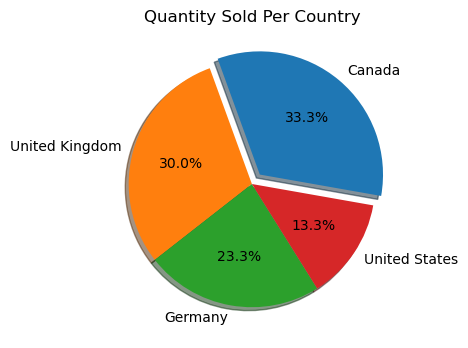

In [14]:
plt.subplots(figsize =(8,4));
explode = (0.1,0,0,0,)
plt.pie(x =infos['Quantity Sold'],labels=infos['Country'],
        explode = explode,
        shadow = True,
        startangle = 350, 
        autopct='%1.1f%%')

plt.title('Quantity Sold Per Country')

plt.show()

In [45]:
#Groupby analysis.

In [15]:
bing = data2.groupby('Country')['Revenue'].max().sort_values(ascending = False).reset_index()

In [16]:
bing

,Country,Revenue
0,United States,9288
1,Germany,8729
2,United Kingdom,8001
3,Canada,4437


In [46]:
#Visualizion output

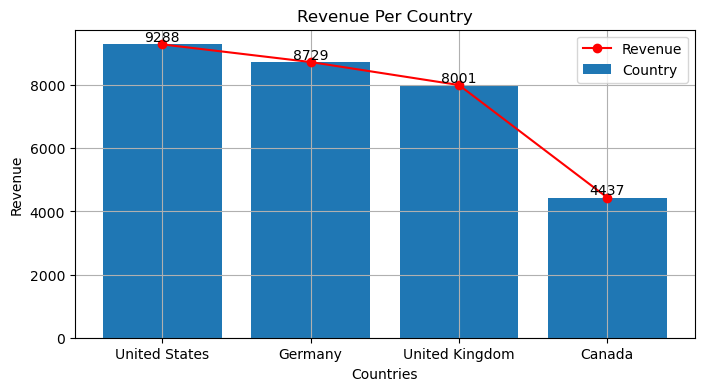

In [17]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(bing['Country'],bing['Revenue'],label = 'Country')

ax.plot(bing['Country'],bing['Revenue'],color = 'r',marker = 'o',label = 'Revenue')

for i, v in enumerate(bing['Revenue']):

    plt.text(i ,v,str(v),ha = 'center',va = 'bottom')


ax.set_xlabel('Countries')

ax.set_ylabel('Revenue')

ax.set_title('Revenue Per Country')

plt.grid()

ax.legend(loc = 'upper right')

plt.show()

In [18]:
data2.head(2)

,ID,Customer Name,Gender,Marital Status,Education,Income,Country,Province or State,City,Latitude,Longitude,Postal code,Location Code,Order Year,Quarter,MonthsAsMember,Loyalty Status,Product Line,Coupon Response,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value
0,837810,Abigail Goris,male,Single,Bachelor,42142,Canada,British Columbia,Dawson Creek,55.759627,-120.237662,U5I 4F1,Rural,2016,Q3,33,Bronze,Computers and Home Office,Coupon 6,3,1182,1004.7,3546,8842.65
1,707928,Ada Glade,male,Married,High School or Below,20978,Germany,Bremen,Bremen,53.079296,8.801694,28759,Rural,2016,Q3,52,Bronze,Computers and Home Office,Coupon 1,1,434,368.9,434,3508.57


In [43]:
#Groupby analysis

In [19]:
area_plt = data2.groupby(['Country','Unit Sale Price'])['Income'].sum()\
.sort_values(ascending = False)\
.reset_index()[:20]

In [20]:
area_plt = area_plt.set_index('Country')

In [21]:
area_plt.head()

,Unit Sale Price,Income
Country,,
Germany,1475,80892
Canada,757,79674
Canada,201,71391
Germany,899,69906
United Kingdom,356,61650


In [44]:
#Visualization output.

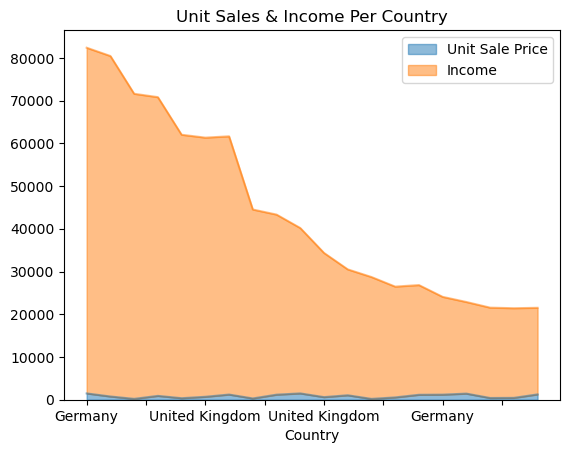

In [22]:
area_plt.plot.area(alpha = 0.5,title = 'Unit Sales & Income Per Country')

plt.show()

In [81]:
#Selected data

In [23]:
local = data2[['Quantity Sold','Revenue','Unit Cost','Unit Sale Price']].\
sort_values('Quantity Sold',ascending = False)

In [24]:
local.head()

,Quantity Sold,Revenue,Unit Cost,Unit Sale Price
11,9,9288,877.20,1032
20,7,8729,1059.95,1247
17,7,8001,971.55,1143
18,6,6552,928.20,1092
6,5,3430,583.10,686


In [42]:
#Visualization output.

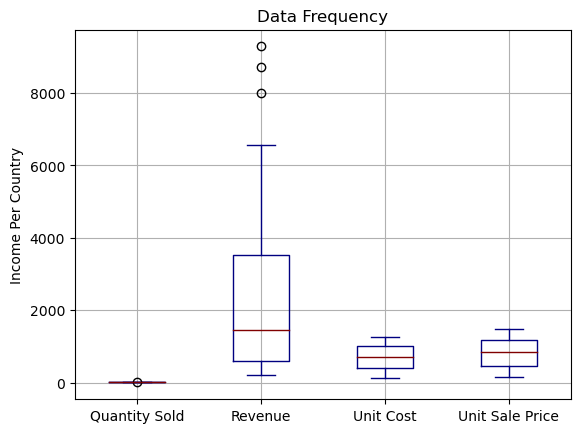

In [25]:
local.abs().plot.box(cmap='jet',grid = True,title = 'Data Frequency',\
               ylabel = 'Income Per Country')
plt.show()

In [40]:
#Selected data for visualization.

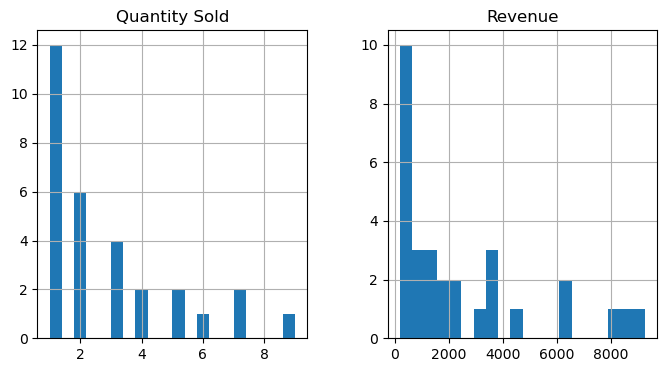

In [26]:
his_visual = data2[['Quantity Sold','Revenue']].abs().sort_values('Quantity Sold',ascending = False).\
hist(bins = 20,figsize=(8,4))

plt.show()

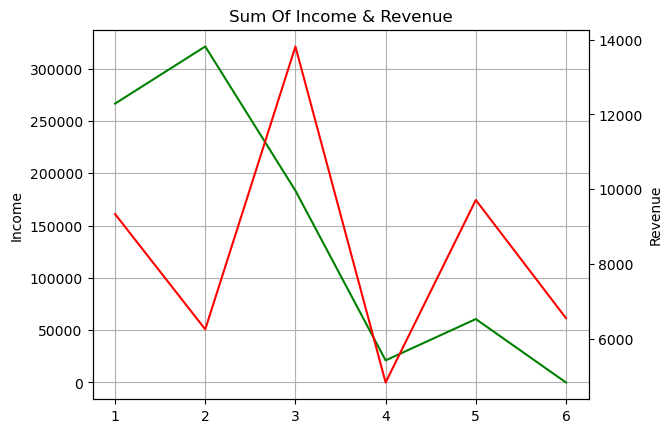

In [27]:
fig,ax1= plt.subplots()

ax1.plot(data2.groupby('Quantity Sold')['Income'].sum()[:6],color ='green')

ax2 = ax1.twinx()

ax2.plot(data2.groupby('Quantity Sold')['Revenue'].sum()[:6],color = 'red')

ax1.set_title('Sum Of Income & Revenue')

ax1.set_ylabel('Income')

ax2.set_ylabel('Revenue')

ax1.grid()

plt.show()

In [28]:
df_ch = data2.groupby('Marital Status')['Income'].max().reset_index().sort_values('Income',ascending= False)

In [29]:
df_ch

,Marital Status,Income
1,Married,80892
2,Single,61650
0,Divorced,33746


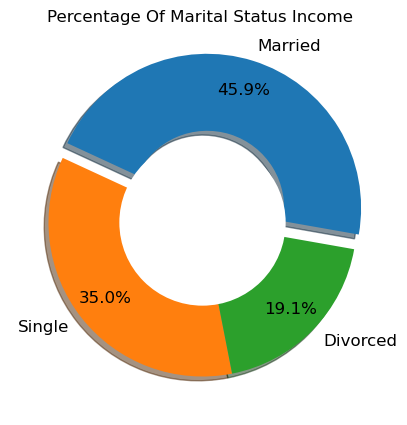

In [30]:
plt.subplots(figsize =(8,5));
explode = (0.1,0,0,)
plt.pie(x =df_ch['Income'],labels=df_ch['Marital Status'],
        explode = explode,
        shadow = True,
        startangle = 350, 
        autopct='%1.1f%%',
        wedgeprops=dict(width = 0.5),pctdistance = 0.80,
        textprops=dict(fontsize=12, fontweight=0.5)),

hole = plt. Circle((0,0),0.54, facecolor = 'white')
plt.title('Percentage Of Marital Status Income ')
plt.gcf().gca().add_artist(hole)

#plt.legend(loc = 2)

plt.show()

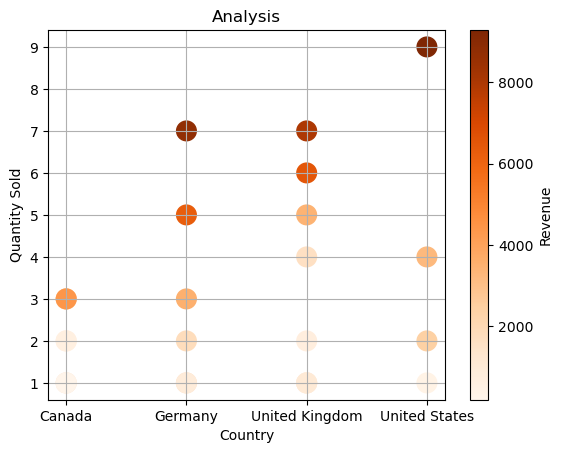

In [31]:
data2[['Country','Quantity Sold','Revenue']].plot\
(kind='scatter',x ='Country',y = 'Quantity Sold',\
c='Revenue',cmap ='Oranges',s = 200,title = 'Analysis',fontsize = 10,grid= True)

plt.show()

